## Summary
The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Creating Pipeline

In [2]:
svc_pred=Pipeline([('scaling',StandardScaler()),('SVM',SVC(kernel='linear'))])

# Exploring the CSV file

In [3]:
df=pd.read_csv('emails.csv')
df.drop('Email No.',axis=1,inplace=True)

In [4]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Checking Null Values
df.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

<Axes: xlabel='Prediction', ylabel='Count'>

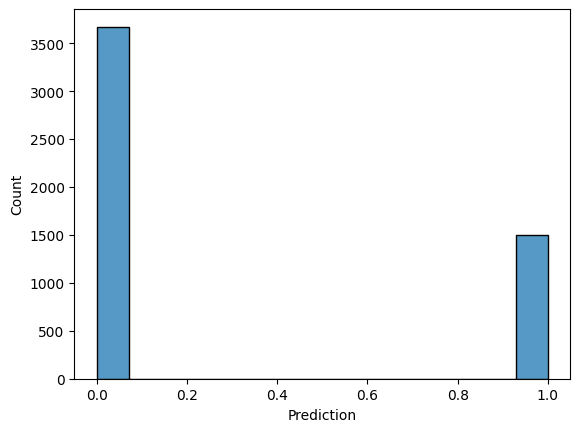

In [6]:
# visualing the Label
sns.histplot(df['Prediction'])

In [7]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [8]:
# Data is Imbalanced

# Balancing the data

In [9]:
from imblearn.combine import SMOTETomek

In [10]:
smk=SMOTETomek(random_state=42)
X=df.drop("Prediction",axis=1)
y=df['Prediction']

In [11]:
X,y=smk.fit_resample(X,y)

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [12]:
y.value_counts()

Prediction
0    3671
1    3671
Name: count, dtype: int64

# Spliting the data

In [13]:
X=df.drop("Prediction",axis=1)

In [14]:
y=df['Prediction']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
import lazypredict

In [17]:
from lazypredict.Supervised import LazyClassifier
l_clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=l_clf.fit(X_train,X_test,y_train,y_test)
models

 10%|███████▋                                                                  | 3/29 [00:18<02:17,  5.29s/it]C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_b

[LightGBM] [Info] Number of positive: 1008, number of negative: 2457
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21600
[LightGBM] [Info] Number of data points in the train set: 3465, number of used features: 2362
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290909 -> initscore=-0.890973
[LightGBM] [Info] Start training from score -0.890973


100%|█████████████████████████████████████████████████████████████████████████| 29/29 [05:15<00:00, 10.87s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.98,0.98,0.98,22.71
LGBMClassifier,0.98,0.98,0.98,0.98,4.96
ExtraTreesClassifier,0.98,0.98,0.98,0.98,5.40
LogisticRegression,0.97,0.97,0.97,0.97,3.19
RandomForestClassifier,0.97,0.96,0.96,0.97,3.70
PassiveAggressiveClassifier,0.95,0.96,0.96,0.95,2.03
Perceptron,0.96,0.95,0.95,0.96,1.62
AdaBoostClassifier,0.96,0.95,0.95,0.96,9.35
LinearSVC,0.94,0.95,0.95,0.94,8.10


# Model Training

In [16]:
svc_pred.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('SVM', SVC(kernel='linear'))])

# Model Testing

In [17]:
prediction=svc_pred.predict(X_test)

# Generating Model Report

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1215
           1       0.89      0.91      0.90       492

    accuracy                           0.94      1707
   macro avg       0.93      0.93      0.93      1707
weighted avg       0.94      0.94      0.94      1707



<IPython.core.display.Javascript object>

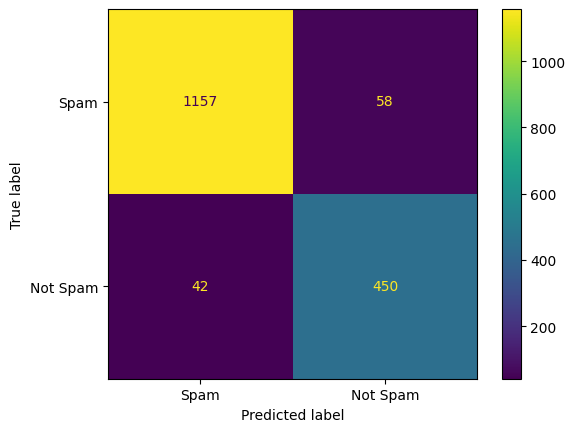

In [19]:
print(classification_report(y_true=y_test,y_pred=prediction))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, prediction), display_labels=['Spam', 'Not Spam'] )
cm_display.plot()
plt.show()

# Testing With Real Data - AI Generated

### Not-spam Mail
Subject: Reminder: Your doctor's appointment is tomorrow at 10am
Hi Adam,
Just a reminder that your doctor's appointment is tomorrow at 10am. Please call the office if you need to reschedule.
Thank you,
Arther


### Spam Mail
Subject: Congratulations! You have won a free trip to Hawaii!
Hello,
You are one of the lucky winners of our online sweepstakes! You have won a free trip to Hawaii for two, including airfare, hotel, and meals. All you have to do is click on the link below and fill out a short survey to claim your prize.
This offer is valid for 24 hours only, so hurry up and don’t miss this opportunity!
Click here to claim your prize: http://www.freetriptohawaii.com
Sincerely,
The Free Trip to Hawaii Team

----------------------------------------------------------------------------------------------------------------------------

Subject: Congratulations! You have won a free trip to Hawaii! Body: Dear Valued Customer,

You are one of the lucky winners of our monthly sweepstakes! You have won a free trip to Hawaii for two, including airfare, hotel, and meals. All you have to do is reply to this email with your full name, address, phone number, and credit card details to claim your prize. Hurry, this offer expires in 24 hours!

This is a once-in-a-lifetime opportunity to enjoy the sun, sand, and surf of Hawaii. Don’t miss this chance to make your dreams come true. Reply now and pack your bags!

Sincerely, The Travel Club

In [20]:
mail='''Subject: Congratulations! You have won a free trip to Hawaii! Body: Dear Valued Customer,

You are one of the lucky winners of our monthly sweepstakes! You have won a free trip to Hawaii for two, including airfare, hotel, and meals. All you have to do is reply to this email with your full name, address, phone number, and credit card details to claim your prize. Hurry, this offer expires in 24 hours!

This is a once-in-a-lifetime opportunity to enjoy the sun, sand, and surf of Hawaii. Don’t miss this chance to make your dreams come true. Reply now and pack your bags!

Sincerely, The Travel Club'''

In [21]:
mail=mail.split()
feature={}

In [22]:
cols_name=X_test.columns.values


In [23]:
for i in cols_name:
    counts=[]
    counts.append(mail.count(i))
    feature[i]=counts

In [24]:
find_df=pd.DataFrame.from_dict(feature)

In [25]:
result=svc_pred.predict(find_df)

In [26]:
if result==0:
    print("'Not-Spam'")
else:
    print("'Spam'")

'Spam'
